<a href="https://colab.research.google.com/github/SriVinayA/SJSU-CMPE255-DataMining/blob/main/DM_Assignment_6_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# anomaly detection using pyOD

In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Sem1/CMPE255 - Data Mining/Assignment 6/Top-50-musicality-global.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Unnamed: 0,Country,Track Name,Artist Name,Album Name,Popularity,Date,Markets,Danceability,Acousticness,...,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,TSignature,Positiveness
0,0,Global,Standing Next to You,Jung Kook,GOLDEN,91,2023-11-03,AR,0.711,0.0447,...,0.809,0.0,2,0.3390,-4.389,0,0.0955,106.017,4,0.816
1,1,Global,greedy,Tate McRae,greedy,100,2023-09-15,AR,0.750,0.2560,...,0.733,0.0,6,0.1140,-3.180,0,0.0319,111.018,1,0.844
2,2,Global,Si No Estás,iñigo quintero,Si No Estás,99,2022-09-23,AR,0.537,0.8270,...,0.421,0.0,5,0.1380,-8.720,1,0.0285,98.224,4,0.524
3,3,Global,Seven (feat. Latto) (Explicit Ver.),Jung Kook,GOLDEN,82,2023-11-03,AR,0.790,0.3120,...,0.831,0.0,11,0.0797,-4.185,1,0.0440,124.987,4,0.872
4,4,Global,Is It Over Now? (Taylor's Version) (From The V...,Taylor Swift,1989 (Taylor's Version),93,2023-10-26,AR,0.596,0.0504,...,0.658,0.0,0,0.1270,-7.346,1,0.0360,100.012,4,0.176


The dataset titled "Top 50 Musicality Global" contains information about various music tracks and their attributes. Here's a summary of the first few rows:

- **Country:** The country where the track is popular.
- **Track Name, Artist Name, Album Name:** Descriptive information about the track.
- **Popularity:** A numerical value representing the popularity of the track.
- **Date:** The date on which the track's data was recorded.
- **Markets:** The markets where the track is available.
- **Danceability, Acousticness, ... Positiveness:** Various numerical attributes that describe the characteristics of the track, such as its danceability, energy, loudness, tempo, and positiveness.

To demonstrate anomaly detection, I will use the PyOD library, which is a Python toolkit for detecting outliers in multivariate data. The process will involve the following steps:

1. **Exploratory Data Analysis (EDA):** Understanding the distribution and relationships of the numerical features.
2. **Preprocessing:** Preparing the data for anomaly detection.
3. **Anomaly Detection:** Applying an anomaly detection algorithm from PyOD.
4. **Visualization:** Creating interactive visualizations to display the results.
5. **Interpretation:** Discussing the findings from each visualization.

I will start with EDA to get a sense of the data, focusing on features like Popularity, Danceability, Energy, Loudness, and Tempo. This will help in identifying any initial insights and in deciding how to proceed with the anomaly detection. Let's begin by visualizing the distributions of some key features.

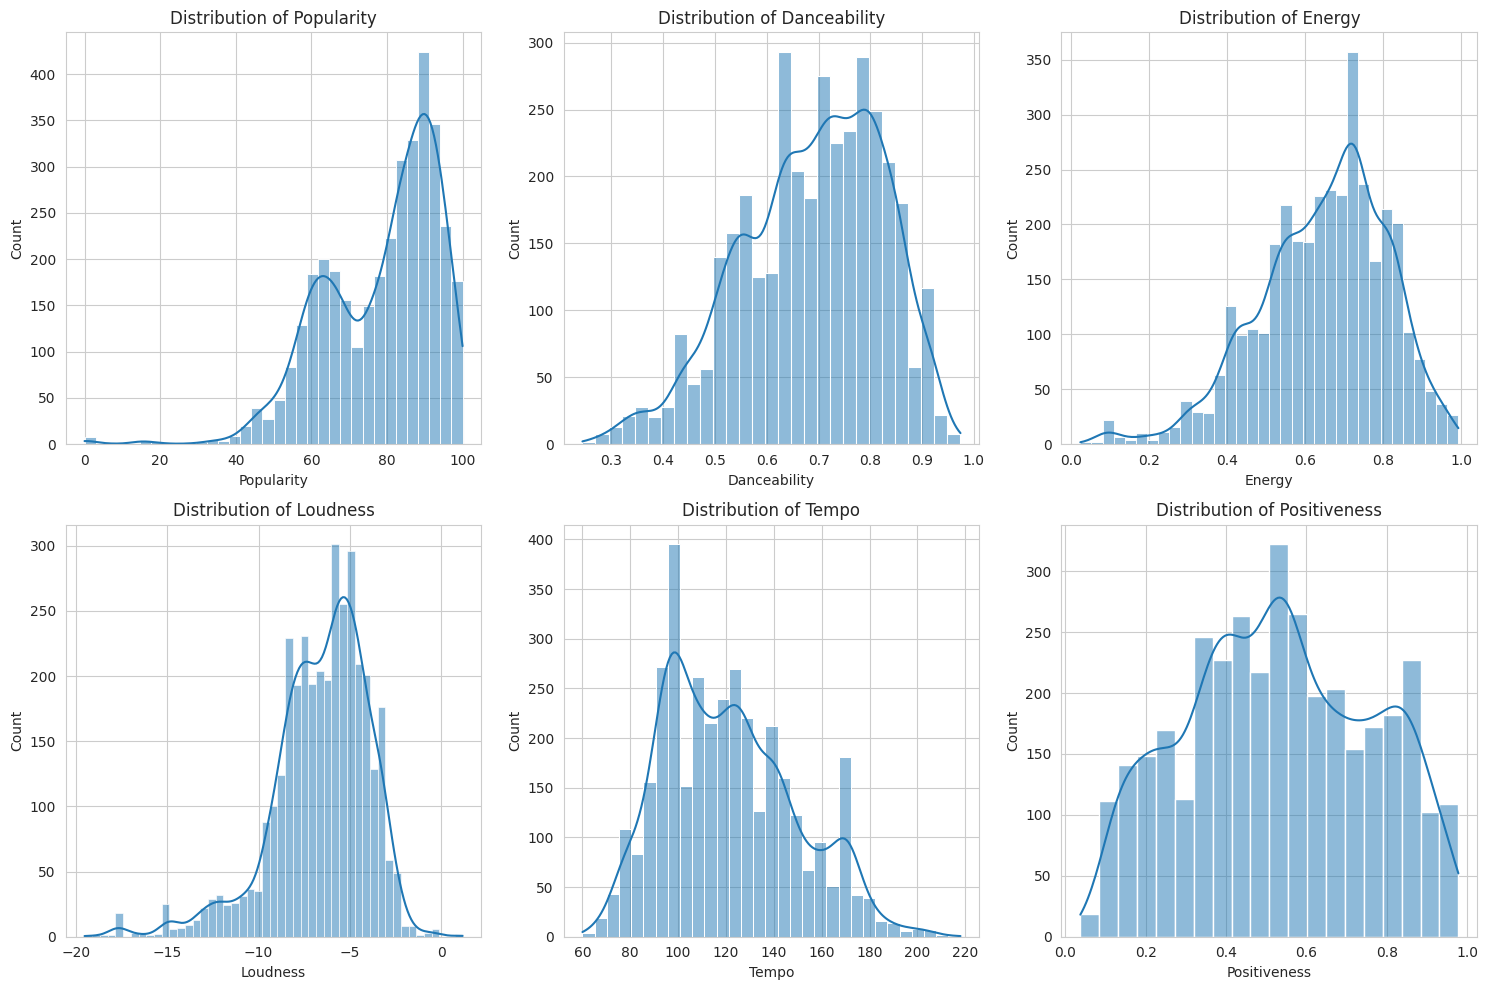

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Selecting a subset of features for initial EDA
features = ['Popularity', 'Danceability', 'Energy', 'Loudness', 'Tempo', 'Positiveness']

# Plotting distributions of the selected features
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

The histograms provide an initial overview of the distribution of several key features in the dataset:

- **Popularity:** Most tracks have high popularity, with a peak around 90-100. This suggests that the dataset predominantly contains very popular tracks.
- **Danceability:** The danceability scores are mostly clustered between 0.5 and 0.8, indicating a tendency towards danceable tracks.
- **Energy:** The energy levels of the tracks are varied, with a slight concentration towards higher energy levels.
- **Loudness:** The loudness of the tracks is mostly between -10 and -3 dB, with a peak around -5 dB.
- **Tempo:** The tempo shows a broad distribution with multiple peaks, suggesting a diverse range of musical tempos.
- **Positiveness:** Positiveness scores are widely spread, indicating a variety of moods in the tracks.

Next, I will preprocess the data for anomaly detection. This includes handling missing values (if any) and scaling the features since anomaly detection algorithms typically require features to be on a similar scale. After preprocessing, I will apply an anomaly detection algorithm from the PyOD library to identify outliers in the dataset. Let's proceed with the preprocessing step.

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Handling missing values
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data[features])

# Standardizing the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Convert the scaled data back to a DataFrame for ease of use
data_preprocessed = pd.DataFrame(data_scaled, columns=features)

# Displaying the first few rows of the preprocessed data
data_preprocessed.head()

,Popularity,Danceability,Energy,Loudness,Tempo,Positiveness
0,0.823387,0.169004,0.994217,0.838063,-0.543470,1.253960
1,1.413915,0.456565,0.529334,1.292846,-0.362407,1.376284
2,1.348301,-1.113960,-1.379134,-0.791105,-0.825618,-0.021703
3,0.232858,0.751499,1.128789,0.914801,0.143346,1.498608
4,0.954615,-0.678932,0.070568,-0.274255,-0.760883,-1.542014


The preprocessing step has been completed, where missing values were imputed using the mean strategy and the features were standardized. This ensures that each feature contributes equally to the anomaly detection process.

Now, I'll apply an anomaly detection algorithm from PyOD. For this demonstration, let's use the Isolation Forest algorithm, which is effective for high-dimensional datasets. Isolation Forest isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. This isolation mechanism is particularly useful for identifying anomalies in the dataset.

After applying the algorithm, I'll create an interactive plot to visualize the anomalies detected in the dataset. The anomalies will be marked distinctly to differentiate them from the normal data points. Let's proceed with applying the Isolation Forest algorithm and visualizing the results.

In [6]:
from pyod.models.iforest import IForest
import plotly.express as px

# Applying Isolation Forest for anomaly detection
iforest = IForest(contamination=0.1)  # setting contamination parameter to 10%
iforest.fit(data_preprocessed)

# Predicting the anomalies
scores_pred = iforest.decision_function(data_preprocessed)  # anomaly scores
y_pred = iforest.predict(data_preprocessed)  # binary predictions (0: normal, 1: anomaly)

# Adding the anomaly scores and predictions to the original dataframe for visualization
data['Anomaly_Score'] = scores_pred
data['Anomaly'] = y_pred

# Selecting a subset of features along with the anomaly information for visualization
viz_features = ['Popularity', 'Danceability', 'Energy', 'Loudness', 'Tempo', 'Anomaly']

# Creating an interactive scatter plot using Plotly
fig = px.scatter_matrix(data, dimensions=viz_features[:-1], color='Anomaly',
                        title="Anomaly Detection in Musical Tracks",
                        labels={col: col.replace('_', ' ') for col in data.columns})

# Showing the plot
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


The scatter plot matrix you have shared shows the relationship between different musical attributes with anomalies highlighted in yellow. The intensity of the yellow color corresponds to the degree to which a point is considered an anomaly by the Isolation Forest algorithm, with a darker shade indicating a higher anomaly score.

From this visualization, you can analyze the following:

- **Data Clusters:** Normal data points (in blue) tend to cluster together, while anomalies (in yellow) are positioned away from these clusters.
- **Feature Relations:** Some features may have a strong correlation (visible as a line or narrow band of points), while others might not show any clear relationship.
- **Anomaly Concentration:** There may be regions where anomalies are more concentrated, suggesting a pattern that deviates from the norm.
- **Outliers:** The most extreme anomalies will be the most isolated yellow points, which are the furthest from the rest of the data.

In [8]:
# code to further analyze anomalies after plotting

# Filter the dataset for anomalies for further inspection
anomalies = data[data['Anomaly'] == 1]

# Display anomalies with their corresponding tracks
print("Anomalies detected:")
print(anomalies[['Track Name', 'Artist Name', 'Anomaly_Score']])

# Potential further analysis:
# 1. Inspect the top N anomalies based on anomaly score
top_anomalies = anomalies.sort_values(by='Anomaly_Score', ascending=False).head(10)
print("\nTop 10 anomalies:")
print(top_anomalies[['Track Name', 'Artist Name', 'Anomaly_Score']])

# 2. Examine if there are common artists or albums among anomalies
common_artists = anomalies['Artist Name'].value_counts()
print("\nCommon artists among anomalies:")
print(common_artists)

common_albums = anomalies['Album Name'].value_counts()
print("\nCommon albums among anomalies:")
print(common_albums)

# 3. If actionable, remove anomalies from dataset
cleaned_data = data[data['Anomaly'] == 0]

# 4. Save the cleaned data to a new CSV file if necessary
cleaned_data.to_csv('/content/drive/MyDrive/Sem1/CMPE255 - Data Mining/Assignment 6/cleaned_data.csv', index=False)


Anomalies detected:
                                             Track Name       Artist Name  \
9                                 My Love Mine All Mine            Mitski   
18                                     I Wanna Be Yours    Arctic Monkeys   
29    What Was I Made For? [From The Motion Picture ...     Billie Eilish   
36        I Remember Everything (feat. Kacey Musgraves)        Zach Bryan   
48                                             Hate You         Jung Kook   
...                                                 ...               ...   
3557                                           Chìm Sâu           RPT MCK   
3563                                 Thích Em Hơi Nhiều        Wren Evans   
3564                                           Hate You         Jung Kook   
3566                        Chuyện Đôi Ta (feat. Muộii)  Emcee L (Da LAB)   
3585                           tình yêu có nghĩa là gì?             tlinh   

      Anomaly_Score  
9          0.045923  
18         